## Motivation

- This is probably the most well known and abused distribution
- We will first look at the standard normal distribution, or Gaussian distribution
- Next, we will look at the general normal distribution (different center and scale), but still normal

## Theory

- **Definition 40.1** A random variable Z follows a standard normal distribution if its PDF is
    - $$PDF = f(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}$$
    - The PDF f(z) exists for range $-\inf \le z \le \inf$.
    - $Z$ is usually used for the PDF of a standard normal random variable

- The CDF of the standard normal distribution is 
    - $$CDF = \Phi(Z) = \int_{-\inf}^{\inf} f(t) dt$$
    - $\Phi$ is usually used for the CDF of a standard normal random variable

- There is no closed-form formula for $\Phi$! If we need actual values for the normal CDF, you need to use normal distribution tables, numerical integration, or software. Here is an example of integration using scipy

In [3]:
import scipy
import numpy as np

MU = 0
SIGMA = 1
def normal_pdf(x, mu, sigma):
    return (1/(sigma * (np.sqrt(2*np.pi)))) * np.exp(-0.5 * ((x-mu)/sigma)**2)
scipy.integrate.quad(normal_pdf, -np.inf, np.inf, args=(MU, SIGMA))

(0.9999999999999997, 1.017819145094224e-08)

- Generating and Plotting the PDF/CDF of normal distribution

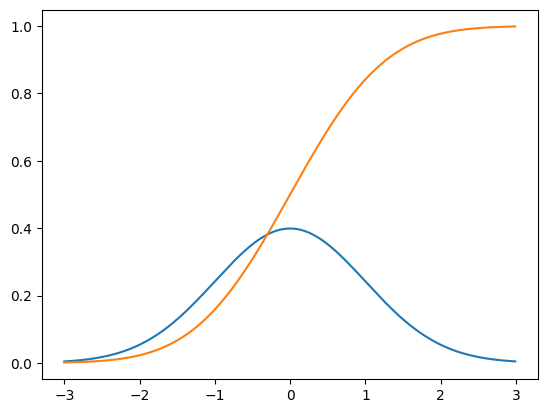

In [11]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def normal_pdf(x, mu, sigma):
    return (1/(sigma * (np.sqrt(2*np.pi)))) * np.exp(-0.5 * ((x-mu)/sigma)**2)

xrange = np.arange(-3,3,0.01)
pdf = normal_pdf(xrange, 0, 1)
cdf = np.array([scipy.integrate.quad(normal_pdf, -np.inf, x, args=(0,1))[0] for x in xrange])
plt.plot(xrange, pdf);
plt.plot(xrange, cdf);

- **Theorem 40.1 (Expected Value and Variance of Standard Normal Distribution)**: If Z is a standard normal distribution E[Z] = 0 and Var[Z] = 1
    - Proof
    - $$\begin{align}
        E[Z] &= \int_{-\inf}^{\inf} z \cdot \frac{1}{\sqrt{2 \pi}} e^{\frac{-z^2}{2}} dz \\
        &= \frac{1}{\sqrt{2 \pi}} \int_{-\inf}^{\inf} z \cdot e^{\frac{-z^2}{2}} dz \\
        &= -\frac{1}{\sqrt{2 \pi}} \int_{-\inf}^{\inf} e^{\frac{-z^2}{2}} d(-\frac{z^2}{2}) dz & \text{rewrite z as differential + add a negative} \\
        &= -\frac{1}{\sqrt{2 \pi}} [e^{-\frac{x^2}{2}}]^{\inf}_{-\inf} \\
        &= -\frac{1}{\sqrt{2 \pi}} (0 - 0) \\
        &= 0
        \end{align}$$
    - $$\begin{align}
        Var[Z] &= E[X^2] - E[X]^2 \\
        &= E[X^2] & \text{because E[X] = 0} \\
        &= \int_{\inf}^{-\inf} z^2 \cdot \frac{1}{\sqrt{2\pi}} e^{\frac{-z^2}{2}} & \text{by LOTUS} \\
        &= 1 & \text{No closed form, evaluated below}
        \end{align}$$

In [4]:
import numpy as np
import scipy
def ex2(x):
    val = x**2 * (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)
    return val
scipy.integrate.quad(ex2, -np.inf, np.inf)

(1.000000000000001, 5.274099880843634e-09)

- **Definition 40.2 (Normal Distribution)** A random variable X is said to follow a $\text{Normal}(\mu, \sigma)$ distribution if it can be expressed as $X = \mu + \sigma Z$ where $Z$ is a standard normal random variable
    - Recall that: 
    - $$\begin{align}
        CDF(Z) &= P(Z \le z) \\
        &= \frac{1}{\sqrt{2\pi}} \int_{-\inf}^{\inf} e^{-\frac{z^2}{2}}
        \end{align}$$
    - Given that $X = \mu + \sigma Z$, we can write CDF(X) as:
    - $$\begin{align}
        CDF(X) &= P(X \le x) \\
        &= P(\mu + \sigma Z \le x) \\
        &= P(Z \le \frac{x - \mu}{\sigma}) \\
        &= \frac{1}{\sqrt{2\pi}} \int_{-\inf}^{\frac{x - \mu}{\sigma}} e^{-\frac{z^2}{2}} dz \\
        &= \Phi(\frac{x - \mu}{\sigma})
        \end{align}$$
    - $$\begin{align}
        PDF(X) &= F'_X(x) \\
        &= \frac{d\Phi}{d(\frac{x-\mu}{\sigma})} \cdot \frac{d(\frac{x-\mu}{\sigma})}{dx} \\
        &= \Phi'(\frac{x-\mu}{\sigma}) \cdot \frac{1}{\sigma} \\
        &= \frac{1}{\sigma} \cdot \frac{1}{\sqrt{2\pi}} e^{-0.5 \cdot (\frac{x-\mu}{\sigma})^2}
        \end{align}$$

- Plotting normal distribution with various values of $\mu, \sigma$ below

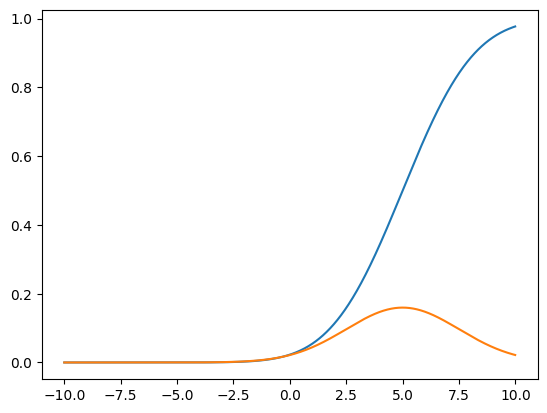

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

MU, SIGMA = 0, 1
MU, SIGMA = 5, 2.5

xvals = np.arange(-10,10,0.01)
cdf = scipy.stats.norm(loc=MU, scale=SIGMA).cdf(xvals)
pdf = scipy.stats.norm(loc=MU, scale=SIGMA).pdf(xvals)
plt.plot(xvals, cdf)
plt.plot(xvals, pdf)

- **Theorem 40.2 (Expected Value and Variance of Normal)** Let X be a $Normal(\mu, \sigma)$ random variable. Then:
    - $E[X] = \mu$
    - $Var[X] = \sigma^2$
    - Proof:
        - $$\begin{align}
            E[X] &= E[\mu + \sigma Z] \\
            &= E[\mu] + \sigma E[Z] \\
            &= E[\mu] & \text{E[Z] = 0 by definition}
            \end{align}$$
        - $$\begin{align}
            Var[X] &= Var[\mu + \sigma Z] \\
            &= Cov[\mu + \sigma Z, \mu + \sigma Z] \\
            &= Cov[\mu, \mu] + Cov[\mu, \sigma Z] + Cov[\sigma Z, \mu] + Cov[\sigma Z, \sigma Z] & \text{Cov of constant is 0} \\
            &= Cov[\sigma Z, \sigma Z] \\
            &= Var[\sigma Z] \\
            &= E[(\sigma Z)^2] - (E[\sigma Z])^2 \\
            &= E[\sigma^2 Z^2] - \sigma^2 E[Z]^2 \\
            &= \sigma^2 [E[Z^2] - (E[Z])^2] \\
            &= \sigma^2 Var[Z] \\
            &= \sigma^2 
            \end{align}$$